# Scrapping of dataset 2 into csv file and sample code to demonstrate the merging of both datasets

### The data scrapped from EPA site provides information on beaches, beach location, length and Beach Access information

In [1]:
import pandas as pd
import numpy as np

filename = "Beach_Attributes.csv"

# Columns we are intrested in the dataset
fields = ['Beach Name', 'BeachLength (Mi)','Beach Access', 'Start Latitude', 'End Latitude', 'Start Longitude', 'End Longitude']

# Reads in the csv as a dataframe
df = pd.read_csv(filename, usecols = fields)

df.head()

,Beach Name,Beach Access,BeachLength (Mi),Start Latitude,Start Longitude,End Latitude,End Longitude
0,333 Commercial Street,Public,0.085,42.051360,-70.184980,42.052280,-70.184000
1,451 Commercial Street,Public,0.057,42.055200,-70.179860,42.055730,-70.179010
2,593 Commercial Street,Public,0.022,42.059340,-70.170730,42.059460,-70.170330
3,637 Commercial Street,Public,0.232,42.059930,-70.168540,42.060880,-70.164200
4,915 Craigville Road,NaN,0.114,41.635864,-70.335649,41.636289,-70.337836


#### The above information is used to provide a comprehensive view of beach access

In [2]:
df.groupby('Beach Access').size()

Beach Access
Private    127
Public     557
dtype: int64

In [3]:
total_num_beaches = df.shape[0]
private_beaches = len(df[df['Beach Access']=='Private'])
public_beaches = len(df[df['Beach Access']=='Public'])
beaches_not_avail = total_num_beaches - private_beaches - public_beaches

### Pie chart to demonstrate the beach access information from the dataset

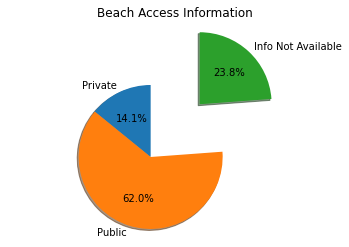

In [4]:
import matplotlib.pyplot as plt

labels = 'Private', 'Public', 'Info Not Available'
sizes = [private_beaches*100/total_num_beaches, public_beaches*100/total_num_beaches, beaches_not_avail*100/total_num_beaches]
explode = (0,0,1)  # exploding not available information

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Beach Access Information")
plt.show()

#### From the above pie chart, it is evident that beach access information is not available for 23.8% of the beaches. Further scrapping of different data sets is required to fill this gap.
#### We can also see that 62% of beaches are available for public access but this is just the intial analysis based on one dataset.

In [6]:
private_beach_len = df[df['Beach Access']=='Private']['BeachLength (Mi)'].sum()
public_beach_len = df[df['Beach Access']=='Public']['BeachLength (Mi)'].sum()

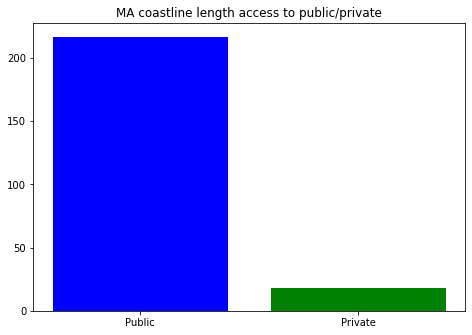

In [8]:
#display length of the beaches access to public/private
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Public', 'Private'], [public_beach_len, private_beach_len], color = ['blue', 'green'])
plt.title("MA coastline length access to public/private")
plt.show()

# This is a test showcasing how the two datasets will be merged

In [7]:
# Takes the first 5 entries of the df to use as an example
df_sample = df.head()
display(df_sample)

# reads in and displays an example of data scrapped from dataset 1
filename_ex = "Beach_Accessibility.csv"
df_ex = pd.read_csv(filename_ex)
display(df_ex)

# This will add a column to df with the accessibility scraped from dataset 1
df_final = pd.merge(df_sample, df_ex, on = "Beach Name")
display(df_final)


,Beach Name,BeachLength (Mi),Start Latitude,Start Longitude,End Latitude,End Longitude
0,333 Commercial Street,0.085,42.051360,-70.184980,42.052280,-70.184000
1,451 Commercial Street,0.057,42.055200,-70.179860,42.055730,-70.179010
2,593 Commercial Street,0.022,42.059340,-70.170730,42.059460,-70.170330
3,637 Commercial Street,0.232,42.059930,-70.168540,42.060880,-70.164200
4,915 Craigville Road,0.114,41.635864,-70.335649,41.636289,-70.337836


,Beach Name,Accessibility
0,451 Commercial Street,Private
1,915 Craigville Road,Public
2,637 Commercial Street,HomeOwners
3,593 Commercial Street,Government
4,333 Commercial Street,ETC


,Beach Name,BeachLength (Mi),Start Latitude,Start Longitude,End Latitude,End Longitude,Accessibility
0,333 Commercial Street,0.085,42.051360,-70.184980,42.052280,-70.184000,ETC
1,451 Commercial Street,0.057,42.055200,-70.179860,42.055730,-70.179010,Private
2,593 Commercial Street,0.022,42.059340,-70.170730,42.059460,-70.170330,Government
3,637 Commercial Street,0.232,42.059930,-70.168540,42.060880,-70.164200,HomeOwners
4,915 Craigville Road,0.114,41.635864,-70.335649,41.636289,-70.337836,Public
